In [24]:
import matplotlib.pyplot as plt
import numpy as np

from skspatial.objects import Line, Point
from skspatial.plotting import plot_2d

default_xsection = {
    'points': [],
    'bearing': None,
    'length': None,
    'plot_orientation': 'horizontal',  # scikit Line object
    'line': None,
}

def xsection_from_points(p1, p2, width=30):

    line = Line.from_points([p1[1], p1[0]], [p2[1], p2[0]])  # must send (lon, lat) to from_points()

    xsection = default_xsection
    xsection['points'] = [p1, p2]
    xsection['line']: line

    return xsection


def xsection_from_origin(origin, bearing, km):

    from vdapseisutils.maputils.utils.utils import sight_point_pyproj

    p1 = sight_point_pyproj(origin, bearing+180, km, ellipse='WGS84')  # p1 returned as (lat, lon)
    p2 = sight_point_pyproj(origin, bearing, km, ellipse='WGS84')  # p2 returns as (lat, lon)

    xsection = xsection_from_points(p1, p2)
    xsection['bearing'] = bearing

    return xsection


def xsection_project_points(xsection, latlons):

    projected_points = []  # list of (lon, lat) for the projected points)
    xs_distances = []  # Projected EQ location distance from beginning of cross-section
    for latlon in latlons:
        xy = (latlon[1], latlon[0])  # convert (lat, lon) to (x, y)
        xy_ = xsection['line'].project_point(xy)
        latlon_ = (xy_[1], xy_[0])  # reverse back to (lat, lon)
        d_ = vdapseisutils.great_circle_distance(xsection['points'][0], latlon_)  # great circle distance between 2 points A1 and latlon_
        projected_points.append(latlon_)
        xs_distances.append(d_)
    # remove negative distances
    # remove distances greater than xs length

    return projected_points, xs_distances

def method_explained():

    # Remember that everything needs to be in (lon, lat) for this!

    # determine A1: volcano point + theta + 180 to n km
    # determine A2: volcano point + theta to n km

    A1 = (0, 0)  # First point of cross-section A-A'
    A2 = (0, 0)  # Second point of cross-section A-A'
    points = [(0, 0), (0, 0), (0, 0)]  # List of EQ epicenters

    xsline = Line.from_points(A1, A2)  # cross-section line
    xs_length = vdapseisutils.great_circle_distance(A1, A2)

    projected_points = []  # list of (lon, lat) for the projected points)
    eqxs_distances = []  # Projected EQ location distance from beginning of cross-section
    for p in points:
        p_ = xsline.project_point(p)  # projected (lon, lat) coordinates on the line
        d_ = vdapseisutils.great_circle_distance(A1, p_)  # great circle distance between 2 points A1 and p_
        projected_points.append(p_)
        eqxs_distances.append(d_)

    # remove negative distances
    # remove distances greater than xs length

    # draw cross-section on map
    # add lables to map
    # plot eq hypocenters cross-section

In [27]:
def plot_all():

    plt.figure(figsize=(6, 6))

    plt.plot((-10, 10), (0, 0), 'r')
    plt.plot((0, 0), (-10, 10), 'k')
    plt.plot((-5, 5), (-5, 5), 'k')

    line = Line.from_points([-5, -5], [5, 5])
    print(line)

    a = Point([2.5, 0])
    aa = line.project_point(a)

    b = Point([-1, 5])
    bb = line.project_point(b)

    c = Point([-2.5, -8])
    cc = line.project_point(c)

    print(aa)
    plt.plot(a[0], a[1], 'or')
    plt.plot(aa[0], aa[1], '*r')
    print()

    print(bb)
    plt.plot(b[0], b[1], 'ok')
    plt.plot(bb[0], bb[1], '*k')
    print()

    print(cc)
    plt.plot(c[0], c[1], 'og')
    plt.plot(cc[0], cc[1], '*g')
    print()

    plt.show()

Line(point=Point([-5, -5]), direction=Vector([10, 10]))
[1.25 1.25]

[2. 2.]

[-5.25 -5.25]



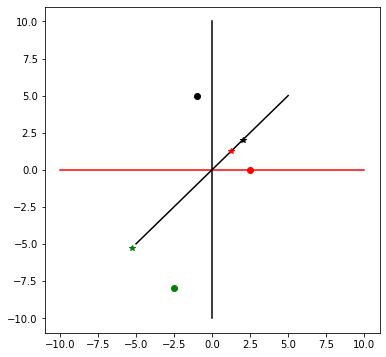

In [28]:
plot_all()